In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
athlete_events = pd.read_csv("athlete_events.csv")
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
regions = pd.read_csv("noc_regions.csv")
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
!pip install pandasql


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from pandasql import sqldf
pysqldf = lambda q:sqldf(q, globals())

In [ ]:
pysqldf("select * from athlete_events limit 5;")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [ ]:
pysqldf("select * from regions limit 5;")

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None


In [ ]:
pysqldf("select min(year) as min_yr, max(year) as max_yr from athlete_events;")

,min_yr,max_yr
0,1896,2016


In [ ]:
#Q1 - Relation to the medals won to the number of players in a particular year in the united States.

Q1 = pysqldf("select Team, Medal, count(1) as medal_count from athlete_events where Year in (2000,2016) and Team ='United States' and Medal <> 'NA' group by Medal ;")
Q1
#total medals won by US in 2010 are 879

,Team,Medal,medal_count
0,United States,Bronze,118
1,United States,Gold,265
2,United States,Silver,113


In [89]:
#Q1 - Relation to the medals won to the number of players in a particular year in the united States.

Q2 = pysqldf("select Team, Medal, count(1) as medal_count from athlete_events where Year in (2000,2016) and Team ='Soviet Union' and Medal <> 'NA' group by Medal ;")
Q2
#total medals won by US in 2010 are 879

,Team,Medal,medal_count


In [87]:
#Q1 - Relation to the medals won to the number of players in a particular year in the united States.

Q3 = pysqldf("select Team, Medal, count(1) as medal_count from athlete_events where Year in (2000,2016) and Team ='Germany' and Medal <> 'NA' group by Medal ;")
Q3
#total medals won by US in 2010 are 879

,Team,Medal,medal_count
0,Germany,0,129
1,Germany,1,78
2,Germany,2,66
3,Germany,3,806


In [ ]:
#total number of medals won in 2010
pysqldf("select Medal, count(*) as total_medal_count from athlete_events where Year in (2000,2016) and Medal <> 'NA' and Year <> 'NA' group by Medal union all select 'SUM' Medal, count(*) from athlete_events;")
#Total count of medals in 2010 are 520

,Medal,total_medal_count
0,Bronze,1383
1,Gold,1328
2,Silver,1316
3,SUM,271116


In [ ]:
#number of players from US from the period of 2000 to 2016
pysqldf("select Name, count(*) as Player_count from athlete_events where Team = 'United States' and Name <> 'NA' and Year in (2000,2016) group by Name;")

,Name,Player_count
0,Aaron Russell,1
1,Aaron Wells Peirsol,1
2,Abbey Weitzeil,4
3,"Abdihakim ""Abdi"" Abdirahman",1
4,"Abigail ""Abbey"" D'Agostino",1
...,...,...
1105,Yolanda Yvette Griffith,1
1106,"Yue ""Jennifer"" Wu",2
1107,Zach Garrett,2
1108,"Zachary ""Zack"" Test",1


In [ ]:
#Percentage of medal won in 2010 by US 
us_medal_perc = (879/4027)*100
us_medal_perc

21.82766327290787

In [ ]:
#Q2 Total number of female and male players from the US
pysqldf("select Team, Sex, count(*) as gender_count from athlete_events where Team = 'United States' and Sex in('F','M') and Year = '2010' group by Sex;")

,Team,Sex,gender_count
0,United States,F,134
1,United States,M,169


In [ ]:
#Hypothesis - 1
#check the total number of particiapants to the medals won for the US, Soviet Union and Germany
#United States
pysqldf("select DISTINCT Name, count(*) as Player_count from athlete_events where Team = 'United States' and Name <> 'NA' and Year <> 'NA';")


,Name,Player_count
0,"James Francis ""Jim"" Zylker",17847


In [ ]:
#Hypothesis-1
#medals won united States
pysqldf("select Team, Medal, count(1) as medal_count from athlete_events where Team ='United States' and Medal <> 'NA' and Year <>'NA' group by Medal ;")

,Team,Medal,medal_count
0,United States,Bronze,1233
1,United States,Gold,2474
2,United States,Silver,1512


In [ ]:
#Hypothesis -1
#Soviet Union
pysqldf("select DISTINCT Name, count(*) as Player_count from athlete_events where Team = 'Soviet Union' and Name <> 'NA' and Year <> 'NA';")

,Name,Player_count
0,Galina Ivanovna Zybina (-Fyodorova),5535


In [ ]:
#Hypothesis -1
#medals won soviet Union
pysqldf("select Team, Medal, count(1) as medal_count from athlete_events where Team ='Soviet Union' and Medal <> 'NA' and Year <>'NA' group by Medal ;")

,Team,Medal,medal_count
0,Soviet Union,Bronze,677
1,Soviet Union,Gold,1058
2,Soviet Union,Silver,716


In [ ]:
#Hypothesis -1
#Germany
pysqldf("select DISTINCT Name, count(*) as Player_count from athlete_events where Team = 'Germany' and Name <> 'NA' and Year <> 'NA';")

,Name,Player_count
0,Sabine Beate Zwiener (-Jauchstetter),9326


In [ ]:
#Hypothesis -1
#medals won germany
pysqldf("select Team, Medal, count(1) as medal_count from athlete_events where Team ='Germany' and Medal <> 'NA' and Year <>'NA' group by Medal ;")

,Team,Medal,medal_count
0,Germany,Bronze,678
1,Germany,Gold,679
2,Germany,Silver,627


In [ ]:
#Hypothesis-2
#players with age less than 30 have won mode medals in United States
pysqldf("select Team, Age, count(*) as medals_won from athlete_events where Age <= 30 and Age <>'NA' and Medal <> 'NA' and Team = 'United States';")

,Team,Age,medals_won
0,United States,21.0,4583


In [ ]:
#Hypothesis-2
#Total number of players below 30 in the United states
pysqldf("select Age, count(*) as player_count from athlete_events where Team = 'United States' and Age <= 30 and Age <> 'NA' order by Age;")

In [82]:
#Hypothesis-2
#players with age less than 30 have won mode medals in Soviet union
pysqldf("select Team, Age, count(*) as medals_won from athlete_events where Age <= 30 and Age <>'NA' and Medal <> 'NA' and Team = 'Soviet Union';")

,Team,Age,medals_won
0,Soviet Union,29.0,4831


In [81]:
#Hypothesis-2
#Total number of players below 30 from Soviet Union
pysqldf("select Age, count(*) as player_count from athlete_events where Team = 'Soviet Union' and Age <= 30 and Age <> 'NA' order by Age;")

,Age,player_count
0,29.0,4831


In [80]:
#Hypothesis-2
#players with age less than 30 have won mode medals in Germany
pysqldf("select Team, Age, count(*) as medals_won from athlete_events where Age <= 30 and Age <>'NA' and Medal <> 'NA' and Team = 'Germany';")

,Team,Age,medals_won
0,Germany,24.0,7430


In [ ]:
#Hypothesis-2
#Total number of players below 30 in the Germany
pysqldf("select Age, count(*) as player_count from athlete_events where Team = 'Germany' and Age <= 30 and Age <> 'NA' order by Age;")

In [ ]:
#Hypothesis-3
#An athlete has more chances of winning medals during winter in US
us_winter = pysqldf("select Year, Team, COUNT(*) AS medal_count from athlete_events LEFT JOIN regions ON athlete_events.NOC=regions.NOC WHERE team='United States' AND Medal<>'NA' AND Season='Winter' GROUP BY Year, Team ORDER BY Year ASC LIMIT 100;")
us_winter
print(" medals won by us in winter:", sum(us_winter.medal_count))

In [ ]:
#Hypothesis-3
#An athlete has more chances of winning medals during summer in US
us_summer = pysqldf("select Year, Team, COUNT(*) AS medal_count from athlete_events LEFT JOIN regions ON athlete_events.NOC=regions.NOC WHERE team='United States' AND Medal<>'NA' AND Season='Summer' GROUP BY Year, Team ORDER BY Year ASC LIMIT 100;")
us_summer
print(" medals won by us in Summer:", sum(us_summer.medal_count))

In [ ]:
#Hypothesis-3
#An athlete has more chances of winning medals during winter in Germany
Germany_winter = pysqldf("select Year, Team, COUNT(*) AS medal_count from athlete_events LEFT JOIN regions ON athlete_events.NOC=regions.NOC WHERE team='Germany' AND Medal<>'NA' AND Season='Winter' GROUP BY Year, Team ORDER BY Year ASC LIMIT 100;")
Germany_winter
print(" medals won by Germany in winter:", sum(Germany_winter.medal_count))

In [79]:
#Hypothesis-3
#An athlete has more chances of winning medals during summer in Germany
Germany_summer = pysqldf("select Year, Team, COUNT(*) AS medal_count from athlete_events LEFT JOIN regions ON athlete_events.NOC=regions.NOC WHERE team='Germany' AND Medal<>'NA' AND Season='Summer' GROUP BY Year, Team ORDER BY Year ASC LIMIT 100;")
Germany_summer
print(" medals won by Germany in Summer:", sum(Germany_summer.medal_count))

 medals won by Germany in Summer: 0


In [ ]:
#Hypothesis-3
#An athlete has more chances of winning medals during winter in Soviet Union
SU_winter = pysqldf("select Year, Team, COUNT(*) AS medal_count from athlete_events LEFT JOIN regions ON athlete_events.NOC=regions.NOC WHERE team='Soviet Union' AND Medal<>'NA' AND Season='Winter' GROUP BY Year, Team ORDER BY Year ASC LIMIT 100;")
SU_winter
print(" medals won by Soviet union in winter:", sum(SU_winter.medal_count))

In [ ]:
#Hypothesis-3
#An athlete has more chances of winning medals during summer in Soviet Union
SU_summer = pysqldf("select Year, Team, COUNT(*) AS medal_count from athlete_events LEFT JOIN regions ON athlete_events.NOC=regions.NOC WHERE team='Soviet Union' AND Medal<>'NA' AND Season='Summer' GROUP BY Year, Team ORDER BY Year ASC LIMIT 100;")
SU_summer
print(" medals won by Soviet Union in Summer:", sum(SU_summer.medal_count))

In [ ]:
#MILESTONE - 3
#Finding correlations among variables
#Correrlation between Height and weight
athlete_events['Height'].corr(athlete_events['Weight'])

In [ ]:
#Correlation between no of medals won to the age
athlete_events['Season']=athlete_events['Season'].astype('category').cat.codes
athlete_events['Event']=athlete_events['Event'].astype('category').cat.codes
athlete_events.corr()

In [ ]:

# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(athlete_events['Season'])
 
# printing label
label 


In [45]:
athlete_events.drop("Season", axis=1, inplace=True)
 

athlete_events["Season"] = label
 
# printing Dataframe
athlete_events.head(5)
#summer = 0
#winter = 1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,Season
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,159,3,3
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,397,3,3
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,348,3,3
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,709,1,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Calgary,Speed Skating,622,3,3


In [ ]:
#dropping nan values
athlete_events.dropna()

In [46]:

# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(athlete_events['Medal'])
 
# printing label
label 

athlete_events.drop("Medal", axis=1, inplace=True)
 

athlete_events["Medal"] = label
 
# printing Dataframe
athlete_events.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Season,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,159,3,3
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,397,3,3
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,348,3,3
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,709,1,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Calgary,Speed Skating,622,3,3


In [52]:
from collections import Counter

In [53]:
Sex_Count = Counter(athlete_events.Sex)
print(Sex_Count)

Counter({'M': 196594, 'F': 74522})


In [57]:
Team_count = Counter(athlete_events.Team)
print(Team_count)

Counter({'United States': 17847, 'France': 11988, 'Great Britain': 11404, 'Italy': 10260, 'Germany': 9326, 'Canada': 9279, 'Japan': 8289, 'Sweden': 8052, 'Australia': 7513, 'Hungary': 6547, 'Poland': 6143, 'Switzerland': 5844, 'Netherlands': 5718, 'Soviet Union': 5535, 'Finland': 5379, 'Spain': 5224, 'China': 4975, 'Russia': 4922, 'Austria': 4866, 'Norway': 4708, 'Czechoslovakia': 4352, 'South Korea': 4344, 'Romania': 4303, 'Brazil': 3772, 'Belgium': 3687, 'Bulgaria': 3518, 'Denmark': 3424, 'Argentina': 3199, 'West Germany': 3199, 'Greece': 2976, 'Mexico': 2857, 'Yugoslavia': 2558, 'East Germany': 2543, 'Ukraine': 2511, 'Cuba': 2464, 'New Zealand': 2328, 'Czech Republic': 1802, 'Belarus': 1783, 'South Africa': 1690, 'Egypt': 1622, 'Portugal': 1472, 'Kazakhstan': 1429, 'India': 1400, 'Turkey': 1353, 'Ireland': 1309, 'Slovenia': 1107, 'Chinese Taipei': 1077, 'Colombia': 1068, 'Slovakia': 1041, 'Luxembourg': 992, 'Chile': 924, 'Puerto Rico': 923, 'Venezuela': 921, 'Croatia': 876, 'Estonia

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

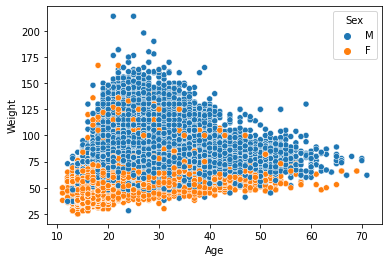

In [78]:
sns.scatterplot(x='Age', y='Weight', hue='Sex', data=athlete_events)


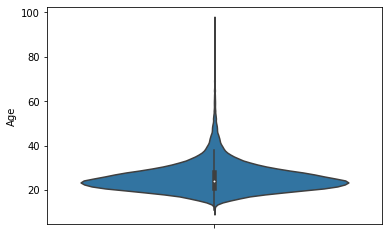

In [66]:
sns.violinplot(y=athlete_events['Age'])

In [67]:
Medals_by_Games = athlete_events['Sport'][athlete_events['Age'] > 50]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

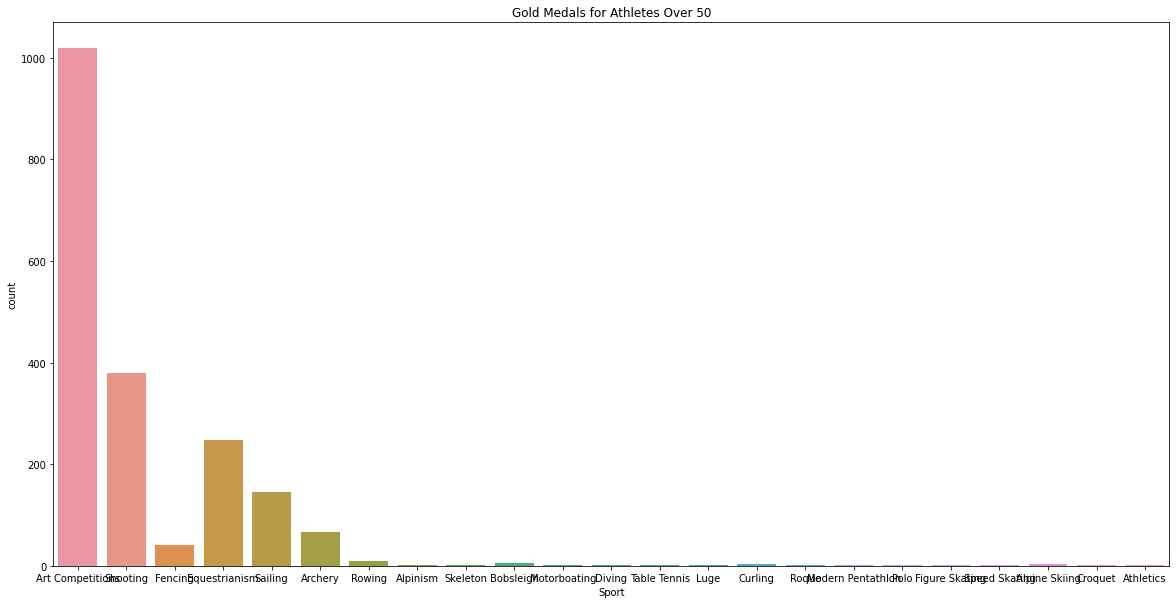

In [68]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(Medals_by_Games)
plt.title('Gold Medals for Athletes Over 50')